In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv('/content/titanic-passengers.csv',encoding='ISO_8859_1')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [ ]:
data.shape

(891, 12)

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


Categorical variables:
*   nominal: Survived,Sex,Ticket,Cabin,Embarked
*   ordinal: Pclass,SibSp,Parch

Numerical variables:

*   discrete: PassangerId
*   Élément de liste: Age,Fare





In [ ]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Handling Missing values

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

More than half of the values of Cabin is missing 

In [ ]:
data.Cabin.unique()

array([nan, 'F G73', 'B71', 'C82', 'C93', 'B41', 'C95', 'B38', 'C52',
       'A32', 'C111', 'C2', 'E101', 'D17', 'B22', 'B3', 'C45', 'B78',
       'A31', 'C128', 'C30', 'A26', 'C22 C26', 'D15', 'T', 'C54', 'C103',
       'C125', 'D20', 'C78', 'E24', 'B82 B84', 'E12', 'D9', 'D28', 'D19',
       'G6', 'D48', 'C90', 'D56', 'E33', 'B86', 'F2', 'B77', 'B39', 'F33',
       'D26', 'C85', 'A34', 'C92', 'F G63', 'D45', 'D', 'C91', 'B79',
       'D21', 'C32', 'C83', 'C47', 'B58 B60', 'E38', 'B28', 'E58', 'A16',
       'B20', 'C126', 'E77', 'B96 B98', 'C65', 'C123', 'C68', 'B35', 'B5',
       'C46', 'E10', 'B51 B53 B55', 'E68', 'B49', 'B30', 'F E69',
       'D10 D12', 'B57 B59 B63 B66', 'D11', 'D36', 'C99', 'D7',
       'C23 C25 C27', 'C106', 'B19', 'C124', 'E8', 'A23', 'A10', 'E31',
       'B73', 'B18', 'E46', 'D50', 'F38', 'B37', 'A7', 'A5', 'E67', 'D33',
       'C118', 'C7', 'A36', 'C62 C64', 'E34', 'D6', 'A6', 'B101', 'E44',
       'C70', 'A20', 'E121', 'C87', 'C50', 'B4', 'C104', 'C148', 'A1

Cabin is a categorical variable and has many unique values,it will not give an important information. 
So we should drop the column Cabin

In [ ]:
data.drop(['Cabin'],axis=1,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [ ]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Age is a numerical variable so we can replace its missing values with the mean. However Embarked is a categorical one we can replace its missing values with the most frequent value.

In [ ]:
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Embarked'].fillna(value=data['Embarked'].mode()[0],inplace=True)

#Data Visualization

In [ ]:
data.Survived.value_counts(normalize=True)

No     0.616162
Yes    0.383838
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Distribution of survivals')

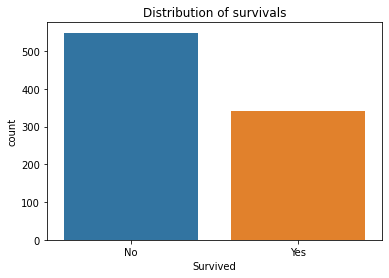

In [ ]:
sns.countplot(x='Survived',data=data)
plt.title('Distribution of survivals')

approximately 62% of passengers drowned

Text(0.5, 1.0, 'Gender Distribution')

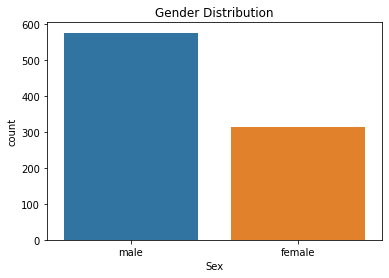

In [ ]:
sns.countplot(x='Sex',data=data)
plt.title('Gender Distribution')

In [ ]:
data.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

Text(0.5, 1.0, 'Distribution of survivals by Sex')

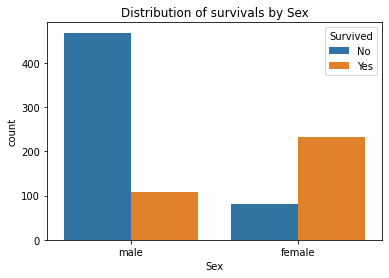

In [ ]:
sns.countplot(x='Sex',hue='Survived',data=data)
plt.title('Distribution of survivals by Sex')

Although the total number of male passengers(65%) is greater than the female(35%),  the female survivors are more than the male ones(approximately = 2* male survivors) which means that the female passengers has more chance to be saved.

Text(0.5, 1.0, 'class Distribution')

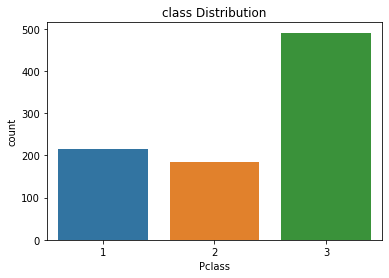

In [ ]:
sns.countplot(x='Pclass',data=data)
plt.title('class Distribution')

In [ ]:
data.Pclass.value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

Text(0.5, 1.0, 'Distribution of survivals by Class')

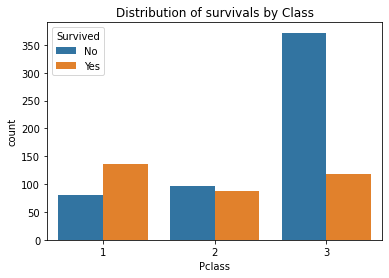

In [ ]:
sns.countplot(x='Pclass',hue='Survived',data=data)
plt.title('Distribution of survivals by Class')

The number of survivors in all the classes is nearly the same.
However more than half of the passengers are from the third class(55%) and the majority of non survivors are from it too. so the passengers from second class and espicially from the first class have more chance to be saved.

Text(0.5, 1.0, 'Embarkation Distribution')

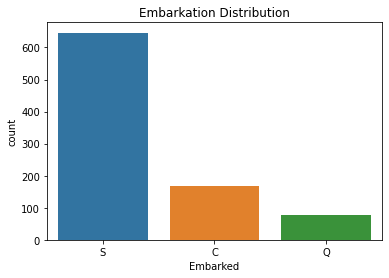

In [ ]:
sns.countplot(x='Embarked',data=data)
plt.title('Embarkation Distribution')

In [ ]:
data.Embarked.value_counts(normalize=True)

S    0.725028
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

Text(0.5, 1.0, 'Distribution of survivals by Embarked')

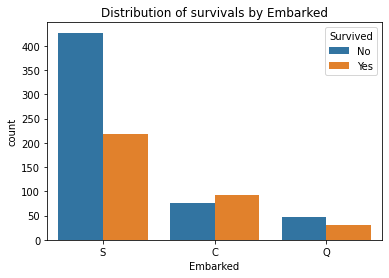

In [ ]:
sns.countplot(x='Embarked',hue='Survived',data=data)
plt.title('Distribution of survivals by Embarked')

The majority of passengers (72,5%) embarked from port 'S'.
Although the port S has the greatest number of survivors, it also has the greatest number of non survivors (~ 2*the number of its survivors).
the number of survivors that embarked from port C are more than the number of non survivors.
 

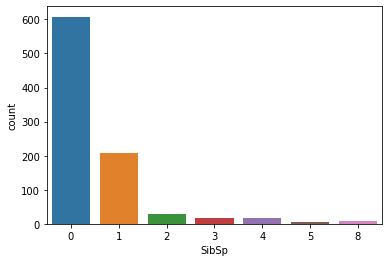

In [ ]:
sns.countplot(x="SibSp",data=data)

In [ ]:
data.SibSp.value_counts(normalize=True)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

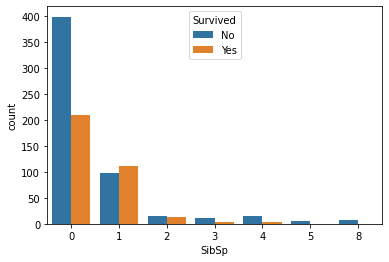

In [ ]:
sns.countplot(x='SibSp',hue='Survived',data=data)

The passengers that have one sibling or spouse abaord Titanic they have more chance to survive

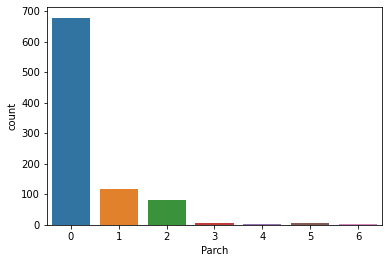

In [ ]:
sns.countplot(x='Parch',data=data)

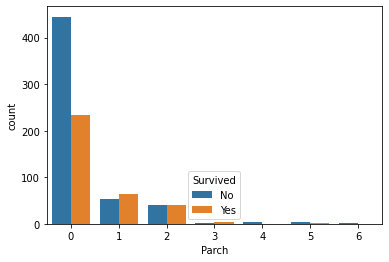

In [ ]:
sns.countplot(x='Parch',hue='Survived',data=data)

Text(0.5, 1.0, 'Distribution of Ages')

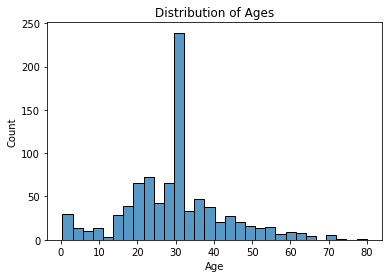

In [ ]:
sns.histplot(data['Age'],bins=30,kde=False)
plt.title('Distribution of Ages')

In [ ]:
data.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

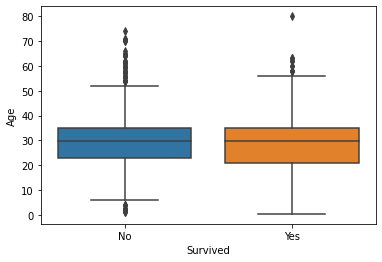

In [ ]:
sns.boxplot(x='Survived',y='Age',data=data)

It seems that the young passengers  has more chance to survive but we have an old passenger(80 ans) that have survived. He may be a first class passenger or female one.

Text(0.5, 1.0, 'Distribution of Fare')

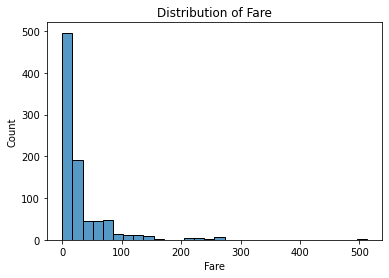

In [ ]:
sns.histplot(data['Fare'],bins=30,kde=False)
plt.title('Distribution of Fare')

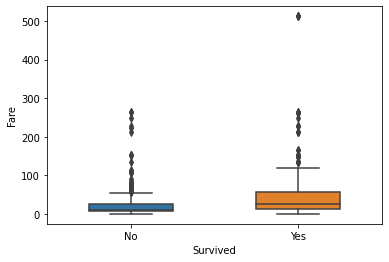

In [ ]:
sns.boxplot(x='Survived',y='Fare',data=data,width=0.5)

The distribution shows that the higher the fare , the more the passenger has a chance to survive.

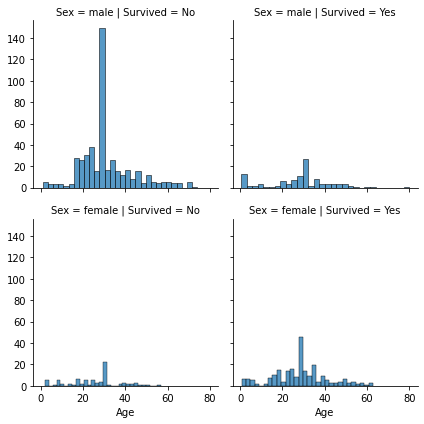

In [ ]:
g=sns.FacetGrid(data,row='Sex',col='Survived')
g.map(sns.histplot,'Age',bins=30)

When the passenger is a female whatever the age is, she has more chance to be saved. However, when the passenger is a male, the younger he is, he has more chance to survive.  

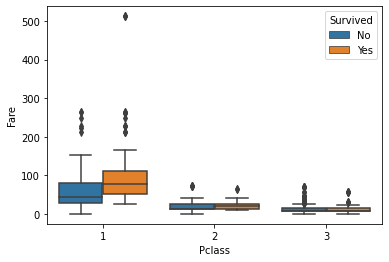

In [ ]:
sns.boxplot(x='Pclass',y='Fare',hue='Survived',data=data)

Even in the first class(rich people) that has the higher number of survivors, if the passenger pay more, he has more chance to be saved.

In [ ]:
data['Survived'] = data['Survived'].map({'No':0 , 'Yes':1})
data['Sex'] = data['Sex'].map({'female': 1, 'male': 0})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q':2})

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


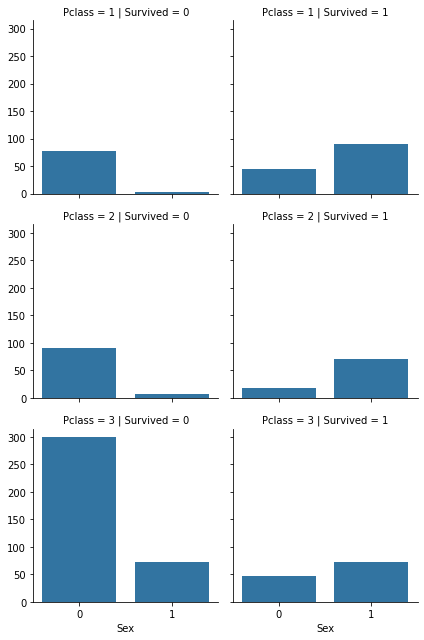

In [ ]:
m=sns.FacetGrid(data,row='Pclass',col='Survived')
m.map(sns.countplot,'Sex')

Whatever class the passengers are from, they will have more chance to survive if they are females.

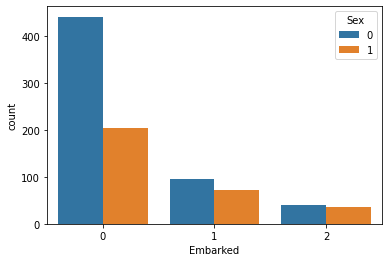

In [ ]:
sns.countplot(x='Embarked',hue='Sex',data=data)

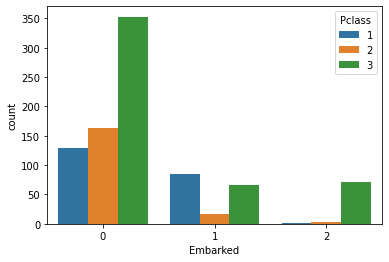

In [ ]:
sns.countplot(x='Embarked',hue='Pclass',data=data)

The majority of the passengers that left from the Q port are from the third class so this explain why this port has non survivors higher than the survivors

In [ ]:
def plot_correlation_map( df ):

    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }

        )

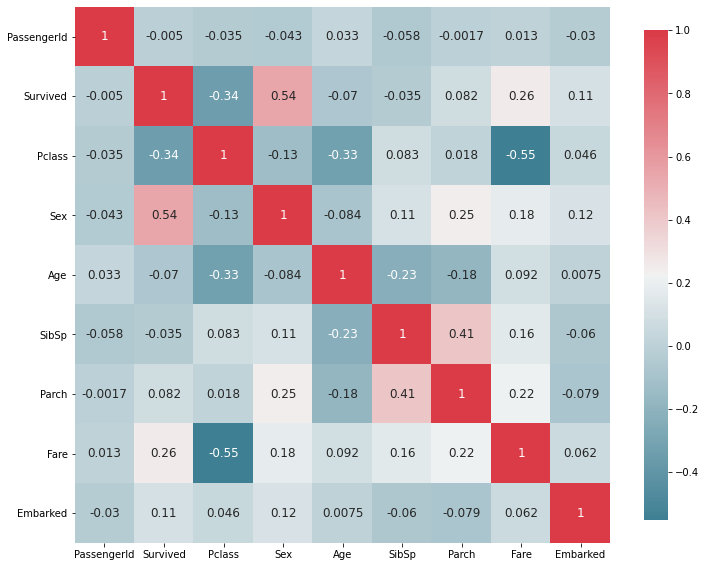

In [ ]:
plot_correlation_map(data)



*   Pclass and Survived are negatively correlated which means the bigger the number of the passenger's class is, the chance of survival will decrease. 
*   Sex and Survived are positively and strongly correlated which means the Survived variable and Sex are dependent.
*   Fare and Survived are positively correlated : the passenger's chance to survive is as high as the Fare he will pay.
*   Parch and SibSp are positively and strongly correlated because the two variables are dependent.
*   Fare and Pclass are negatively correlated : the bigger the number of the passenger's class is, the lower the Fare is and this is true because the first class passengers pay more than the two other classes






In [ ]:
data[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363





*   62.96% of the first class passengers have survived
*   47.32% of second class passengers have survived
*   24.24% of third class passengers have survived



In [ ]:
data.Name.head()

0                     Collander, Mr. Erik Gustaf
1                        Moen, Mr. Sigurd Hansen
2                         Jensen, Mr. Hans Peder
3    Palsson, Mrs. Nils (Alma Cornelia Berglund)
4                         Davidson, Mr. Thornton
Name: Name, dtype: object

In [ ]:
names=map(lambda name: name.split(',')[1].split('.')[0],data['Name'])
title=pd.Series(map(lambda name: name[1:],names))

In [ ]:
data['Title']=title
data.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Dr', 'Major', 'Don', 'Master', 'Rev', 'Col',
       'Mlle', 'Lady', 'Jonkheer', 'Mme', 'Sir', 'Capt', 'the Countess',
       'Ms'], dtype=object)

In [ ]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                     "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [ ]:
data['Title']=data['Title'].replace(Title_Dictionary)
data.Title.unique()

array(['Mrs', 'Miss', 'Officer', 'Royalty', 'Master'], dtype=object)

Text(0.5, 1.0, 'Distribution of passengers by Title')

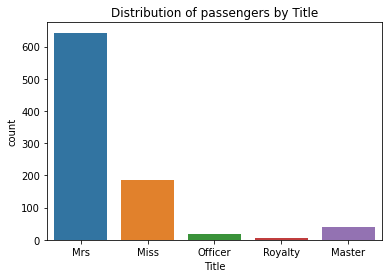

In [ ]:
sns.countplot(x='Title',data=data)
plt.title('Distribution of passengers by Title')

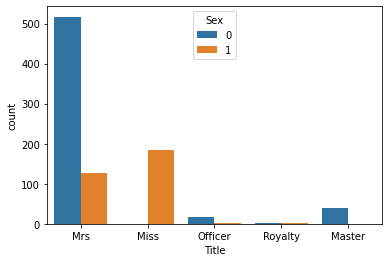

In [ ]:
sns.countplot(x='Title',hue='Sex',data=data)

In [ ]:
data.replace({'Mrs':0,'Miss':1,'Officer':2,'Master':3,'Royalty':4},inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


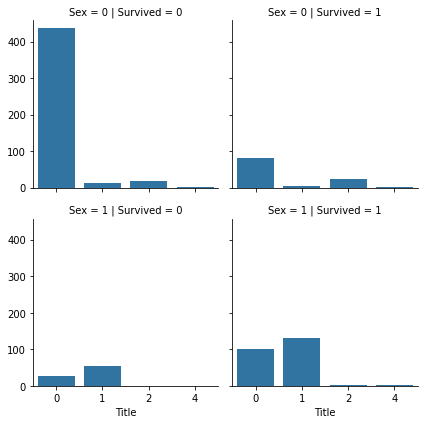

In [ ]:
m=sns.FacetGrid(data,row='Sex',col='Survived')
m.map(sns.countplot,'Title')



*   For the female passengers, there is no non survivors with the title Royalty or Officer this means when the passenger is a female and has these titles, she has more chance to survive
*   For the male passenger when he has the title 'Mrs' he has more chance to not survive



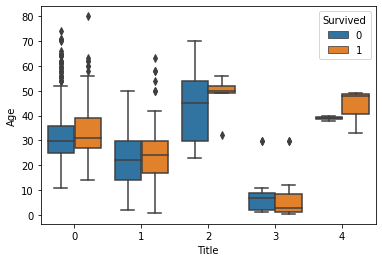

In [ ]:
sns.boxplot(x='Title',y='Age',hue='Survived',data=data)

when the passenger's title is Royalty, whatever his age he will have more chance to survive and for the other titles when the passenger is younger he has more chance to survive

In [ ]:
data['FamilySize']=data['SibSp']+data['Parch']

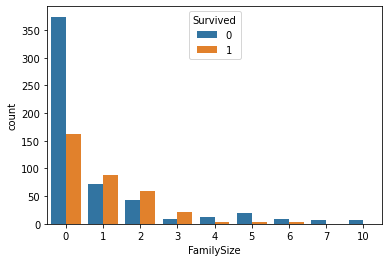

In [ ]:
sns.countplot(x='FamilySize',hue='Survived',data=data)

The FamilySize variable is better and more useful than using the SibSp and Parch variable individually because it will reduce the number of features 